# HSQL to Unidades Vecinales

This notebook creates __santiago_unidadesvecinales_hqsl_4_5_kmh__, which has HQSL mean data for all Unidades Vecinales in Santiago, Chile.

## Import libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/data.py:24: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


## Notebook config

In [2]:
##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

# save output to database?
save = False
# How to save?
if_exists='replace'
# save to local?
save_local = True
# use local data?
local_data = True

# Persona speed
walk_speed = 4.5
speed_name = str(walk_speed).replace('.','_')

##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

In [3]:
# 'alex' or 'edgar'
all_local_dirs = 'edgar'
# Output hexs resolution
res = 10

In [4]:
if all_local_dirs == 'alex':
    grl_dir = "../../../data/external/temporal_todocker/santiago/proximidad/"
elif all_local_dirs == 'edgar':
    grl_dir = "../../../data/processed/santiago/"
else:
    print("WARNING: Fix all_local_dirs variable")

## Download data

In [5]:
if local_data:
    hex_gdf = gpd.read_file(grl_dir + f'santiago_hexanalysis_res{res}_{speed_name}_kmh.geojson')
else:
    query = f'SELECT * FROM projects_research.santiago_hexanalysis_{speed_name}_kmh WHERE res = {res}'
    hex_gdf = aup.gdf_from_query(query)

hex_gdf = hex_gdf.dropna()
# Show
print(hex_gdf.shape)
hex_gdf.head(1)

(58695, 31)


,sociability_supplying,sociability_caring,sociability_living,sociability_enjoying,sociability_learning,sociability_working,sociability,environmental_impact_supplying,environmental_impact_caring,environmental_impact_living,...,hex_id,supplying,caring,living,enjoying,learning,working,hqsl,res,geometry
0,4.583333,1.875,0.543189,4.702381,5.0,0.494537,17.198441,10.0,6.334387,5.75,...,8ab2c5540647fff,5.87963,5.25712,3.59773,4.894993,5.833333,4.943534,30.406339,10,"POLYGON ((-70.67723 -33.43729, -70.67786 -33.4..."


## Load data

Unidades vecninales

In [15]:
uv_gdf = gpd.read_file(f"../../../data/processed/santiago/santiago_unidades_vecinales_urbanas.gpkg")
uv_gdf = uv_gdf.to_crs("EPSG:4326")
uv_gdf = uv_gdf.explode()
print(uv_gdf.shape)
uv_gdf.head(4)

(1082, 78)


,,NOMBRE_REG,CODIGO_REG,NOMBRE_COM,CUT,NOMBRE_UV,CODIGO_UV,PORC_VIV,COD_UNICO_,PERSONAS,HOMBRE,...,SALUD_ALTA,SALUD_MEDI,SALUD_BAJA,SALUD_SIN_,SALUD_PRIV,SALUD_PUBL,SALUD_OTRO,TOTAL_SALU,per_num,geometry
0,0,METROPOLITANA DE SANTIAGO,13,LA PINTANA,13112,001,001,100.0,13112_001,18756,9141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18756.0,"POLYGON ((-70.65049 -33.55560, -70.65031 -33.5..."
1,0,METROPOLITANA DE SANTIAGO,13,LA PINTANA,13112,002,002,100.0,13112_002,12405,6073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12405.0,"POLYGON ((-70.63973 -33.55713, -70.63973 -33.5..."
2,0,METROPOLITANA DE SANTIAGO,13,LA PINTANA,13112,003,003,100.0,13112_003,13937,6739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13937.0,"POLYGON ((-70.63759 -33.55743, -70.63759 -33.5..."
3,0,METROPOLITANA DE SANTIAGO,13,LA PINTANA,13112,004,004,100.0,13112_004,1959,938,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1959.0,"POLYGON ((-70.61015 -33.58535, -70.61015 -33.5..."


## Hexagon to Census Zone

### Spatial join

In [16]:
uv_hex = gpd.sjoin(hex_gdf, uv_gdf)
print(uv_hex.shape)
uv_hex.head(4)

(73726, 110)


,sociability_supplying,sociability_caring,sociability_living,sociability_enjoying,sociability_learning,sociability_working,sociability,environmental_impact_supplying,environmental_impact_caring,environmental_impact_living,...,FARMACIAS,SALUD_ALTA,SALUD_MEDI,SALUD_BAJA,SALUD_SIN_,SALUD_PRIV,SALUD_PUBL,SALUD_OTRO,TOTAL_SALU,per_num
0,4.583333,1.875000,0.543189,4.702381,5.000000,0.494537,17.198441,10.000000,6.334387,5.75,...,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,4.0,6762.0
0,4.583333,1.875000,0.543189,4.702381,5.000000,0.494537,17.198441,10.000000,6.334387,5.75,...,6.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,4.0,6879.0
1,1.875000,1.666667,0.000000,0.324074,3.402778,0.000000,7.268519,1.250000,7.438390,0.00,...,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,610.0
2,3.202652,3.052083,0.134702,6.846871,0.815972,0.000000,14.052281,7.773449,5.122512,10.00,...,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,6793.0


### Data processing

In [17]:
cols_join = list(hex_gdf.columns)[2:]
cols_join.remove('res')
cols_join.remove('hex_id')
cols_join.remove('geometry')
cols_join.append('COD_UNICO_')

In [18]:
uv_hex = uv_hex[cols_join].copy() #Added this because it tried to calculate mean of geom
# se_hex = se_hex.drop(columns=['gse_dom','gse_prom'])
uv_hex = uv_hex.groupby(['COD_UNICO_']).mean()
uv_hex = uv_hex.reset_index()
# Merge back to geometry
uv_hqsl = pd.merge(uv_gdf, uv_hex, right_on='COD_UNICO_',
                   left_on='COD_UNICO_', how = 'right')
print(uv_hqsl.shape)
uv_hqsl.head(4)

(1069, 104)


,NOMBRE_REG,CODIGO_REG,NOMBRE_COM,CUT,NOMBRE_UV,CODIGO_UV,PORC_VIV,COD_UNICO_,PERSONAS,HOMBRE,...,wellbeing_learning,wellbeing_working,wellbeing,supplying,caring,living,enjoying,learning,working,hqsl
0,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,1,1,100.0,13101_1,4198,2125,...,6.418707,5.181370,41.923747,7.183674,6.554340,5.354966,9.006621,4.359695,6.754143,39.213439
1,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,10,10,100.0,13101_10,5009,2439,...,3.769290,3.420782,17.680400,4.476229,2.717649,1.768751,1.968953,2.450489,3.704052,17.086124
2,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,11,11,100.0,13101_11,6879,3358,...,6.920440,3.851591,29.473708,5.726492,4.045753,3.102165,4.239370,5.181441,4.593451,26.888672
3,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,12,12,100.0,13101_12,6762,3449,...,6.486315,4.226771,27.979638,4.981798,4.147523,2.395720,4.644254,4.411437,4.391713,24.972445


<AxesSubplot: >

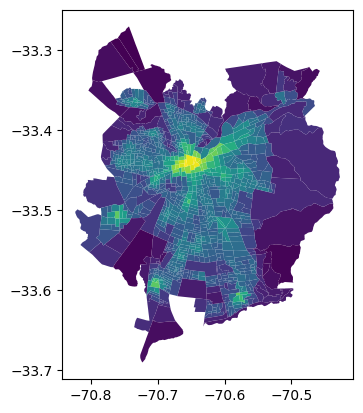

In [19]:
uv_hqsl.plot('hqsl')

In [20]:
uv_hqsl.hqsl.mean()

15.821325842091667

## Upload data

In [22]:
if save:
    table = f'santiago_unidadesvecinalesanalysis_{speed_name}_kmh'
    schema = 'projects_research'
    aup.gdf_to_db_slow(uv_hqsl, table, schema, if_exists='append')
if save_local:
    uv_hqsl.to_file(grl_dir + f'santiago_unidadesvecinalesanalysis_{speed_name}_kmh.geojson')

## Distribution analysis

In [25]:
uv_hqsl.sort_values(by='hqsl', ascending=False).head(10)

,NOMBRE_REG,CODIGO_REG,NOMBRE_COM,CUT,NOMBRE_UV,CODIGO_UV,PORC_VIV,COD_UNICO_,PERSONAS,HOMBRE,...,wellbeing_learning,wellbeing_working,wellbeing,supplying,caring,living,enjoying,learning,working,hqsl
44,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,5,5,100.0,13101_5,11175,5718,...,7.275408,5.207158,43.834809,7.629417,6.292257,6.925903,8.414470,6.014391,6.820592,42.097029
11,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,2,2,100.0,13101_2,6029,3026,...,6.276401,5.282760,44.196696,8.070324,6.573145,6.379553,8.961437,4.611745,7.058001,41.654206
42,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,48,48,100.0,13101_48,17101,8549,...,6.676892,5.069052,43.495449,7.672927,7.135856,6.028871,8.656160,4.941775,6.620427,41.056017
22,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,3,3,100.0,13101_3,20954,10788,...,6.083691,5.090031,43.256554,8.149446,6.306791,6.364571,8.742984,4.434917,6.862019,40.860727
39,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,45,45,100.0,13101_45,20856,10715,...,6.681488,5.042908,42.580162,7.685773,6.582746,6.489665,8.309804,4.930849,5.751850,39.750688
8,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,17,17,100.0,13101_17,5218,2532,...,8.420688,5.138163,41.375746,7.604568,5.465163,6.421898,7.048397,6.659896,6.125196,39.325117
0,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,1,1,100.0,13101_1,4198,2125,...,6.418707,5.181370,41.923747,7.183674,6.554340,5.354966,9.006621,4.359695,6.754143,39.213439
7,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,16,16,100.0,13101_16,8347,4007,...,8.870485,4.664142,40.435115,7.075398,5.411625,6.336657,7.145932,6.867352,5.656831,38.493794
41,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,47,47,100.0,13101_47,4311,2104,...,6.405458,5.129118,40.261325,6.831498,7.214526,4.740318,8.560110,4.298666,6.702668,38.347787
5,METROPOLITANA DE SANTIAGO,13,SANTIAGO,13101,14,14,100.0,13101_14,5490,2692,...,8.776782,5.878777,40.373756,7.436006,5.183289,5.702758,6.285715,6.156156,6.033112,36.797036


<AxesSubplot: >

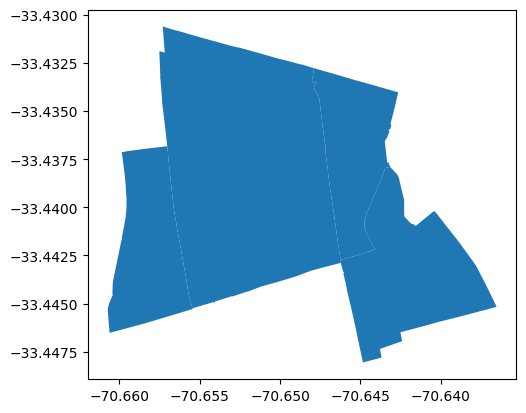

In [30]:
uv_hqsl.sort_values(by='hqsl', ascending=False).head(4).plot()

<AxesSubplot: >

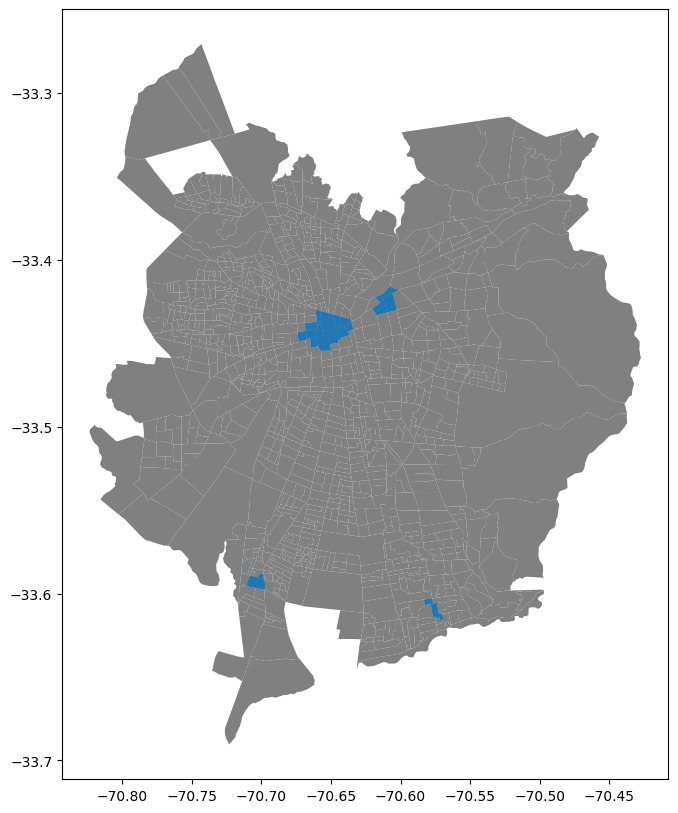

In [52]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,10))
uv_hqsl.sort_values(by='sociability', ascending=False).head(20).plot(ax=ax)
uv_hqsl.plot(color='grey',ax=ax, zorder=-1)